# Exploring each type of feature
- <a href='#sec1'><b>Binary Features</b></a>
- <a href='#sec2'><b>Categorical Features</b></a>
- <a href='#sec3'><b>Continuous or ordinal features</b></a>

- Data Explanation from Kaggle<br>
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', header=0)

In [3]:
all_fs = train.columns[2:]
binary_fs = sorted([f for f in all_fs if '_bin' in f])
categorical_fs = sorted([f for f in all_fs if '_cat' in f])
other_fs = sorted([f for f in all_fs
            if f not in binary_fs
            if f not in categorical_fs])

In [4]:
print("# total of features: %8d" % len(all_fs))
print("# of binary features: %7d" % len(binary_fs))
print("# of categorical features: %1d" % len(categorical_fs))
print("# of other features: %8d" % len(other_fs))

# total of features:       57
# of binary features:      17
# of categorical features: 14
# of other features:       26


<a id='sec1'></a>
# Binary Features

In [5]:
binaries = train[binary_fs]
binary_fs

['ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin']

<b>There are two kinds of binary features. One comes with 'calc' label and the other with 'ind' label.</b>

<b>Examine the frequency of positive class (i.e. 1) for each feature. Then create a contingency table to see how they separate with the target class</b>

In [6]:
def create_contingency_table(x, y, output=True, percent=False, printout=False):
    #if (x.shape[0] != 1) or (x.shape[0] != 1):
    #    print('Error: inputs must be column vectors')
    if len(x) != len(y):
        print('Error: inputs must be of the same length')
    total = len(x)
    
    xy = pd.DataFrame()
    xy['x'] = x
    xy['y'] = y
    
    zeroF_zeroT = len(xy[(xy.x == 0) & (xy.y == 0)])
    zeroF_oneT = len(xy[(xy.x == 0) & (xy.y == 1)])
    oneF_zeroT = len(xy[(xy.x == 1) & (xy.y == 0)])
    oneF_oneT = len(xy[(xy.x == 1) & (xy.y == 1)])
    unknown = total - (zeroF_zeroT + zeroF_oneT + oneF_zeroT + oneF_oneT)
    
    f0_frequency = zeroF_zeroT + zeroF_oneT
    f1_frequency = oneF_zeroT + oneF_oneT
    contingency = np.array([zeroF_zeroT, zeroF_oneT, oneF_zeroT, oneF_oneT, unknown])
                   
    if percent:
        f0_frequency = 100*(f0_frequency/total)
        f1_frequency = 100*(f1_frequency/total)
        contingency = 100*(contingency/total)
        total = 1
        
    if printout:
        if percent:
            print('Feature Distribution: f0=%3.1f%% f1=%3.1f%%' % (f0_frequency, f1_frequency))
            print('feature=0, class=0: %4.1f%%' % (contingency[0]))
            print('feature=0, class=1: %4.1f%%' % (contingency[1]))
            print('feature=1, class=0: %4.1f%%' % (contingency[2]))
            print('feature=1, class=1: %4.1f%%' % (contingency[3]))
            print('Unknown Data      : %4.1f' % (contingency[4]))
            
        else:
            print('Feature Distribution: f0=%7d f1=%7d' % (f0_frequency, f1_frequency))
            print('feature=0, class=0: %7d /%7d' % (contingency[0], total))
            print('feature=0, class=1: %7d /%7d' % (contingency[1], total))
            print('feature=1, class=0: %7d /%7d' % (contingency[2], total))
            print('feature=1, class=1: %7d /%7d' % (contingency[3], total))
            print('Uknown Data       : %7d /%7d' % (contingency[4], total))   

    if output:
        return contingency
    else:
        return

In [7]:
def calculate_conditional_prob_bin(contingency, output=True, printout=False):
    prob_class1_cond_feature0 = contingency[1]/np.sum(contingency[:2])
    prob_class1_cond_feature1 = contingency[3]/np.sum(contingency[2:])
    if printout:
        print('p(class=1|feature=0)=%.4f' % prob_class1_cond_feature0)
        print('p(class=1|feature=1)=%.4f' % prob_class1_cond_feature1)
    if output:
        return np.array([prob_class1_cond_feature0, prob_class1_cond_feature1])
    else:
        return

In [8]:
y = train.target
predictive_ratios = []
for i in range(len(binary_fs)):
    fs = binary_fs[i]
    x = binaries[fs]
    print('==== %s ====' % fs)
    contingency = create_contingency_table(x,y, output=True, printout=True, percent=True)
    prob = calculate_conditional_prob_bin(contingency, output=True, printout=True)
    predictive_ratios.append(prob[1]/prob[0])

==== ps_calc_15_bin ====
Feature Distribution: f0=87.8% f1=12.2%
feature=0, class=0: 84.6%
feature=0, class=1:  3.2%
feature=1, class=0: 11.8%
feature=1, class=1:  0.4%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0365
p(class=1|feature=1)=0.0362
==== ps_calc_16_bin ====
Feature Distribution: f0=37.2% f1=62.8%
feature=0, class=0: 35.9%
feature=0, class=1:  1.4%
feature=1, class=0: 60.5%
feature=1, class=1:  2.3%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0363
p(class=1|feature=1)=0.0365
==== ps_calc_17_bin ====
Feature Distribution: f0=44.6% f1=55.4%
feature=0, class=0: 43.0%
feature=0, class=1:  1.6%
feature=1, class=0: 53.4%
feature=1, class=1:  2.0%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0365
p(class=1|feature=1)=0.0364
==== ps_calc_18_bin ====
Feature Distribution: f0=71.3% f1=28.7%
feature=0, class=0: 68.7%
feature=0, class=1:  2.6%
feature=1, class=0: 27.7%
feature=1, class=1:  1.1%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0364
p(class=1|feature=1)=0.0366


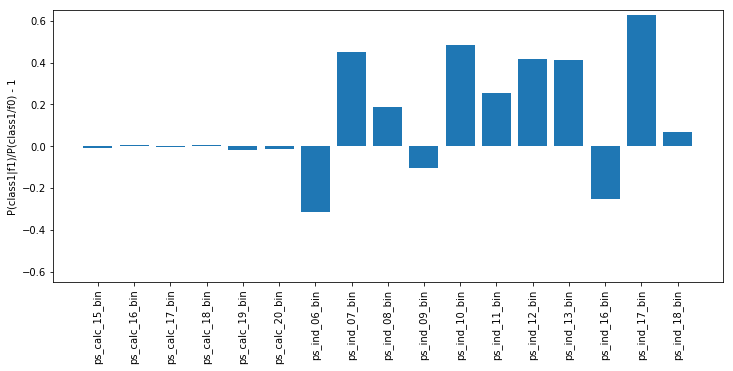

In [9]:
prob_differential = np.array(predictive_ratios) - 1

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.bar(binary_fs, prob_differential)
ax.set_ylabel('P(class1|f1)/P(class1/f0) - 1')
ax.set_ylim([-0.65, 0.65])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

<b>It appears that the 'ind' binary features are more useful in discriminating the two classes than the 'calc' ones. Correlation/co-segregation with other features of the similar kind (e.g. 'ind') to be investigated later</b>

<a id='sec2'></a>
# Categorical Features

In [10]:
categoricals = train[categorical_fs]
categorical_fs

['ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat']

<b>There are two kinds of categorical features. One has label 'car' and the other 'ind'</b>

<b>Check what and how many categories there are for each feature</b>

In [11]:
for feature in categorical_fs:
    categories = sorted(categoricals[feature].unique())
    if -1 in categories:
        num_categories = len(categories) - 1
        print('%s: %d categories with missing values' % (feature, num_categories))
    else:
        num_categories = len(categories)
        print('%s: %d categories' % (feature, num_categories))
    print(categories)

ps_car_01_cat: 12 categories with missing values
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ps_car_02_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_03_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_04_cat: 10 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ps_car_05_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_06_cat: 18 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
ps_car_07_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_08_cat: 2 categories
[0, 1]
ps_car_09_cat: 5 categories with missing values
[-1, 0, 1, 2, 3, 4]
ps_car_10_cat: 3 categories
[0, 1, 2]
ps_car_11_cat: 104 categories
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9

In [12]:
def encode_my_categorical_labels(categorical_feature_vector):
    '''
    Custome version of categorical label encoding. Takes a pd.Series of 
    a categorical feature. Creates a new DataFrame whose columnes 
    designate each category (including missing value) in the Series. 
    For each category, inser 1 if the sample is of that category, 
    otherwise insert 0.
    '''
    encoded = pd.DataFrame()
    feature = categorical_feature_vector.name
    categories = sorted(categorical_feature_vector.unique())
    for cat in categories:
        if cat == -1:
            cat_name = feature + '_NaN'
        else:
            cat_name = feature + '_' + str(cat)
        encoded[cat_name] = (categorical_feature_vector == cat).astype('int')
    return encoded

In [13]:
def calculate_conditional_prob_cat(categorical_feature_vector, target_vector, 
                                   output=True, printout=False):
    '''
    Custom encodes the categorical feature column (see encode_my_categorical_labels() method).
    Then for each encoded category, calculte the conditional probability of sample being in
    class1 (class information is stored in target_vector input. Therefore, the two input
    vectors must be of the same length and aligned) given the category
    (i.e p(class=1|category)). Output and printout options are there as output options.
    The output is returned as DataFrame
    '''
    # Create a dict to store cond. probs
    conditional_probs = {}
    
    # Custome encode the feature column (pd.Series)
    encoded = encode_my_categorical_labels(categorical_feature_vector)
    
    # Calculate conditional probability of being in classes 0 and 1 give category
    for category in encoded.columns:
        data = encoded[category]
        cat0 = len(data[data == 0])
        cat1 = len(data[data == 1])
        class1_given_cat0 = len(data[(data == 0) & (target_vector == 1)])
        class1_given_cat1 = len(data[(data == 1) & (target_vector == 1)])
        
        prob_class1_cond_cat0 = class1_given_cat0 / cat0
        prob_class1_cond_cat1 = class1_given_cat1 / cat1
        probs = np.array([prob_class1_cond_cat0, prob_class1_cond_cat1])
        
        conditional_probs[category] = probs
        
        if printout:
            print('p(class=1|%s=0)=%.4f' % (category, probs[0]))
            print('p(class=1|%s=1)=%.4f' % (category, probs[1]))
    
    result = pd.DataFrame(conditional_probs).T
    result = result.rename(columns={0: 'p(class1|category=0)', 1: 'p(class1|category=1)'})
        
    if output:
        return result
    else:
        return

<b>The first function above creates a column for each of the category for a single feature and convert into n_categories binary features. Second function use the output of the first function and calcualtes the conditional probability of being in class1 (or class0) given the category (i.e. 1 is entered for that sample for that now binary category)</b>

In [14]:
y = train.target
conditional_probs = pd.DataFrame()
for feature in categorical_fs:
    data = categoricals[feature]
    result = calculate_conditional_prob_cat(data, y)
    conditional_probs = pd.concat([conditional_probs, result], axis=0)

In [15]:
# Examine only the entries for non-NaN categories
non_NaN_inds = [ind for ind in conditional_probs.index if 'NaN' not in ind]
cat_cond_probs_noNaNs = conditional_probs.loc[non_NaN_inds, :]

In [16]:
cat_cond_probs_noNaNs['(f1/f0)_ratio_minus_1'] = (cat_cond_probs_noNaNs.iloc[:, 1]/cat_cond_probs_noNaNs.iloc[:, 0]) -1

In [17]:
cat_cond_probs_noNaNs

,p(class1|category=0),p(class1|category=1),(f1/f0)_ratio_minus_1
ps_car_01_cat_0,0.036373,0.043869,0.206069
ps_car_01_cat_1,0.036424,0.046818,0.285370
ps_car_01_cat_10,0.036399,0.036976,0.015843
ps_car_01_cat_11,0.033699,0.041581,0.233885
ps_car_01_cat_2,0.036424,0.042910,0.178077
ps_car_01_cat_3,0.036435,0.037549,0.030568
ps_car_01_cat_4,0.036323,0.039161,0.078141
ps_car_01_cat_5,0.036360,0.039246,0.079385
ps_car_01_cat_6,0.037230,0.029763,-0.200571
ps_car_01_cat_7,0.039756,0.028770,-0.276322


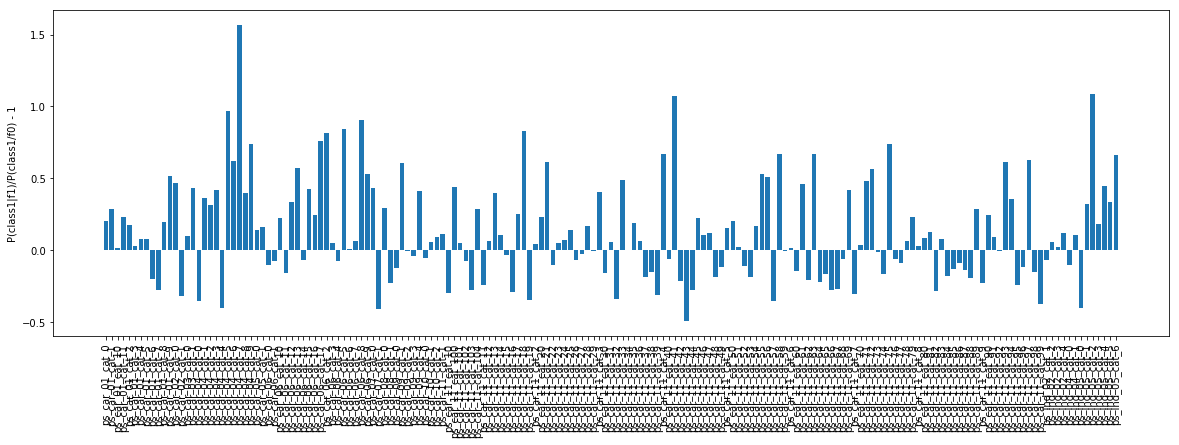

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax.bar(cat_cond_probs_noNaNs.index, cat_cond_probs_noNaNs.iloc[:, -1])
ax.set_ylabel('P(class1|f1)/P(class1/f0) - 1')
#ax.set_ylim([-0.65, 0.65])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [19]:
cat_cond_probs_noNaNs.describe(percentiles=[0.5])

,p(class1|category=0),p(class1|category=1),(f1/f0)_ratio_minus_1
count,175.000000,175.000000,175.000000
mean,0.036817,0.041320,0.130236
std,0.002854,0.012083,0.345865
min,0.033699,0.018423,-0.495916
50%,0.036431,0.038724,0.066587
max,0.058554,0.093525,1.566962


<b>So even the best category of a feature yields class 1 label only ~9% of the time but some categories have high discriination power. ~2.5 times more likely to be in class1 given that category=1 is pretty decent.</b>

In [20]:
cat_cond_probs_noNaNs.sort_values('(f1/f0)_ratio_minus_1',ascending=False).head(10)

,p(class1|category=0),p(class1|category=1),(f1/f0)_ratio_minus_1
ps_car_04_cat_7,0.036434,0.093525,1.566962
ps_ind_05_cat_2,0.036171,0.075526,1.088028
ps_car_11_cat_41,0.036240,0.075110,1.072588
ps_car_04_cat_5,0.036415,0.071560,0.965096
ps_car_06_cat_8,0.036369,0.069405,0.908351
ps_car_06_cat_5,0.036375,0.067095,0.844524
ps_car_11_cat_18,0.036385,0.066504,0.827793
ps_car_06_cat_2,0.036368,0.065961,0.813740
ps_car_06_cat_17,0.036219,0.063830,0.762349
ps_car_04_cat_9,0.035607,0.061889,0.738118


In [21]:
cat_cond_probs_noNaNs.sort_values('(f1/f0)_ratio_minus_1',ascending=True).head(10)

,p(class1|category=0),p(class1|category=1),(f1/f0)_ratio_minus_1
ps_car_11_cat_43,0.036548,0.018423,-0.495916
ps_car_07_cat_1,0.058554,0.034766,-0.406246
ps_car_04_cat_4,0.036453,0.021739,-0.403643
ps_ind_05_cat_0,0.056739,0.033865,-0.403140
ps_car_11_cat_99,0.036725,0.023003,-0.373649
ps_car_04_cat_0,0.051536,0.033451,-0.350919
ps_car_11_cat_57,0.036529,0.023715,-0.350782
ps_car_11_cat_19,0.036556,0.023936,-0.345226
ps_car_11_cat_32,0.036709,0.024328,-0.337272
ps_car_02_cat_1,0.049505,0.033772,-0.317808


<b>Now compare the 'car' and 'ind' features</b>

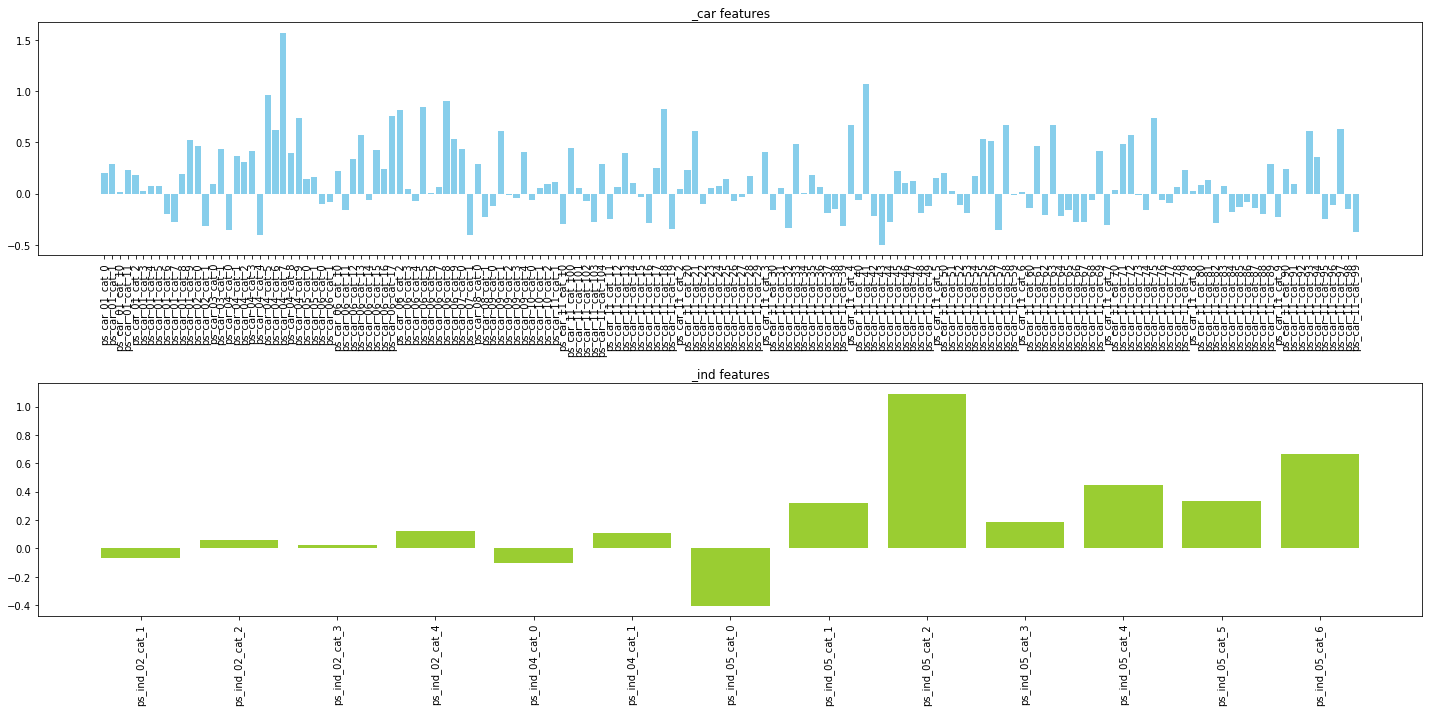

In [22]:
car_inds = [ind for ind in cat_cond_probs_noNaNs.index if 'car' in ind]
ind_inds = [ind for ind in cat_cond_probs_noNaNs.index if 'ind' in ind]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
ax1.bar(car_inds, cat_cond_probs_noNaNs.iloc[:,-1][car_inds], color='skyblue')
ax2.bar(ind_inds, cat_cond_probs_noNaNs.iloc[:,-1][ind_inds], color='yellowgreen')
ax1.set_title('_car features', fontsize=12)
ax2.set_title('_ind features', fontsize=12)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()

<a id='sec3'></a>
# Other Features

In [23]:
others = train[other_fs]
other_fs

['ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03']

In [24]:
others2 = others.copy()
others2 = others2.replace({-1: np.NaN})

In [25]:
others2

,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,...,ps_car_13,ps_car_14,ps_car_15,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03
0,0.6,0.5,0.2,3.0,1.0,10.0,1.0,10.0,1.0,5.0,...,0.883679,0.370810,3.605551,2.0,5.0,0.0,11.0,0.7,0.2,0.718070
1,0.3,0.1,0.3,2.0,1.0,9.0,5.0,8.0,1.0,7.0,...,0.618817,0.388716,2.449490,1.0,7.0,0.0,3.0,0.8,0.4,0.766078
2,0.5,0.7,0.1,2.0,2.0,9.0,1.0,8.0,2.0,7.0,...,0.641586,0.347275,3.316625,5.0,9.0,0.0,12.0,0.0,0.0,NaN
3,0.6,0.9,0.1,2.0,4.0,7.0,1.0,8.0,4.0,2.0,...,0.542949,0.294958,2.000000,0.0,2.0,0.0,8.0,0.9,0.2,0.580948
4,0.4,0.6,0.0,2.0,2.0,6.0,3.0,10.0,2.0,12.0,...,0.565832,0.365103,2.000000,0.0,0.0,0.0,9.0,0.7,0.6,0.840759
5,0.7,0.8,0.4,3.0,1.0,8.0,2.0,11.0,3.0,8.0,...,0.879049,0.406202,3.000000,5.0,4.0,0.0,6.0,0.9,1.8,2.332649
6,0.2,0.6,0.5,2.0,2.0,8.0,1.0,8.0,3.0,10.0,...,0.639683,0.368782,3.162278,2.0,3.0,0.0,8.0,0.6,0.1,0.617454
7,0.1,0.5,0.1,1.0,2.0,7.0,1.0,6.0,1.0,13.0,...,0.900574,0.374833,3.316625,5.0,4.0,0.0,13.0,0.7,0.4,0.607248
8,0.9,0.8,0.6,3.0,1.0,7.0,3.0,9.0,4.0,11.0,...,0.780641,0.407431,2.828427,5.0,3.0,0.0,6.0,0.9,0.7,0.901388
9,0.7,0.8,0.8,2.0,2.0,8.0,2.0,9.0,1.0,11.0,...,1.458184,0.390256,3.605551,1.0,2.0,0.0,4.0,0.9,1.4,2.316652


In [26]:
others2.describe()

,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,...,ps_car_13,ps_car_14,ps_car_15,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,552592.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,487440.000000
mean,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,...,0.813265,0.374691,3.065899,1.900378,4.423318,0.012451,7.299922,0.610991,0.439184,0.894047
std,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,...,0.224588,0.045610,0.731366,1.983789,2.699902,0.127545,3.546042,0.287643,0.404264,0.345413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237
25%,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,...,0.670867,0.350428,2.828427,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.633443
50%,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,...,0.765811,0.373497,3.316625,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.801561
75%,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,...,0.906190,0.398121,3.605551,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.083974
max,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,...,3.720626,0.636396,3.741657,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945


<b>Check for correlation among features. I used Spearman's method instead of Pearson's because it appears more approproate for ordinal (ranked) variables.</b><br>
- <a href='https://en.wikipedia.org/wiki/Pearson_correlation_coefficient'>Wiki Link for Pearson's</a>
- <a href='https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient'>Wiki Link for Spearmans's</a>

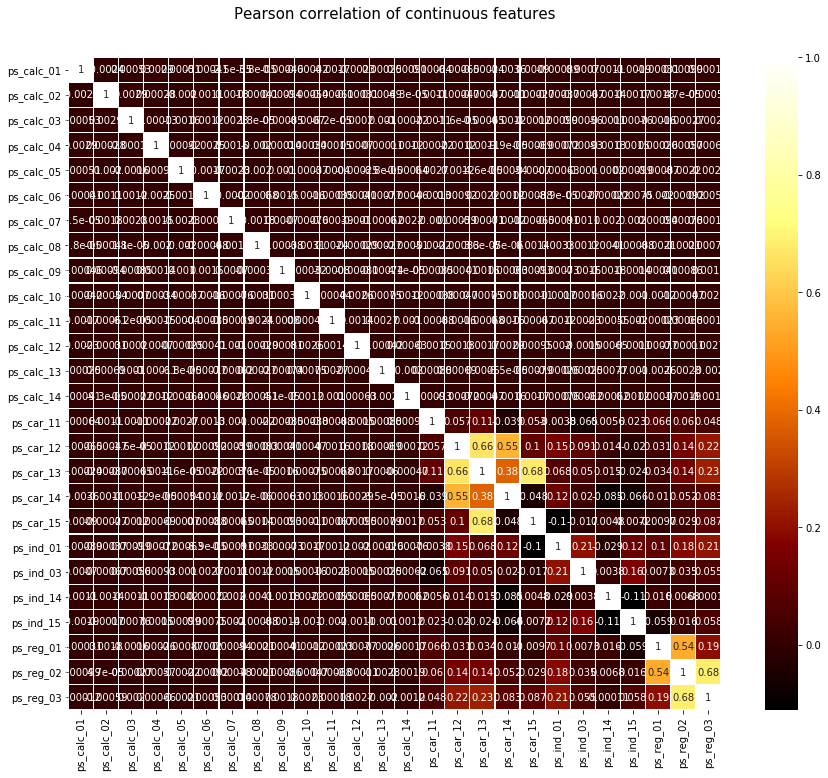

In [27]:
colormap = cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(others2.corr(method='spearman'),linewidths=0.2,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

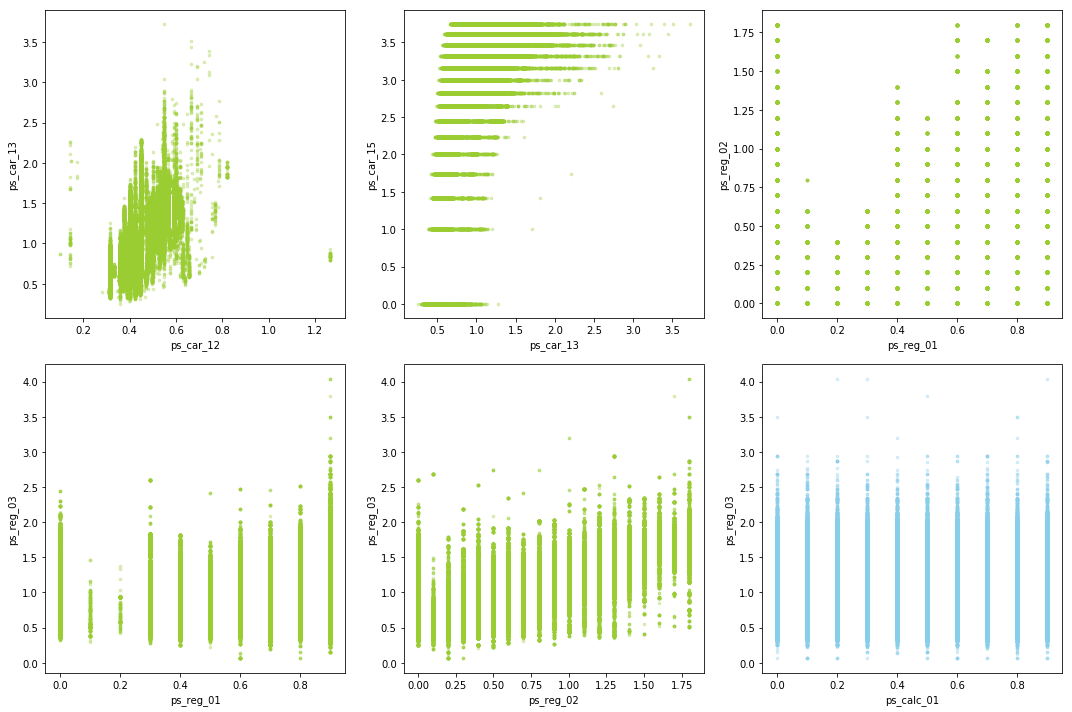

In [28]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
ax1.scatter(others2['ps_car_12'], others2['ps_car_13'], s=7, color='yellowgreen', alpha=0.3)
ax1.set_xlabel('ps_car_12')
ax1.set_ylabel('ps_car_13')
ax2.scatter(others2['ps_car_13'], others2['ps_car_15'], s=7, color='yellowgreen', alpha=0.3)
ax2.set_xlabel('ps_car_13')
ax2.set_ylabel('ps_car_15')
ax3.scatter(others2['ps_reg_01'], others2['ps_reg_02'], s=7, color='yellowgreen', alpha=0.3)
ax3.set_xlabel('ps_reg_01')
ax3.set_ylabel('ps_reg_02')
ax4.scatter(others2['ps_reg_01'], others2['ps_reg_03'], s=7, color='yellowgreen', alpha=0.3)
ax4.set_xlabel('ps_reg_01')
ax4.set_ylabel('ps_reg_03')
ax5.scatter(others2['ps_reg_02'], others2['ps_reg_03'], s=7, color='yellowgreen', alpha=0.3)
ax5.set_xlabel('ps_reg_02')
ax5.set_ylabel('ps_reg_03')
ax6.scatter(others2['ps_calc_01'], others2['ps_reg_03'], s=7, color='skyblue', alpha=0.3)
ax6.set_xlabel('ps_calc_01')
ax6.set_ylabel('ps_reg_03')
plt.tight_layout()

<b>Although Spearman's correlation test suggests correlations among some of the features, notably among 'car' features and 'reg' features, but visually their correlations/relationships are not so obvious.</b>

<b>So try running PCA blindly to see if they segregate in to some space...</b>

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [30]:
y2 = y[others2.dropna().index]

In [31]:
scaler_std = StandardScaler()
scaler_robust = RobustScaler()
scaler_minmax = MinMaxScaler()

X_std = scaler_std.fit_transform(np.array(others2.dropna()))
X_robust = scaler_robust.fit_transform(np.array(others2.dropna()))
X_minmax = scaler_minmax.fit_transform(np.array(others2.dropna()))

pca_std = PCA()
pca_robust = PCA()
pca_minmax = PCA()
Xpca_std = pca_std.fit_transform(X_std)
Xpca_robust = pca_robust.fit_transform(X_robust)
Xpca_minmax = pca_minmax.fit_transform(X_minmax)

In [32]:
X_std.shape, Xpca_std.shape

((453046, 26), (453046, 26))

In [33]:
if False:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.scatter(Xpca_std[:, 0], Xpca_std[:, 1], c=y2, cmap=cm.Reds, s=7)
    ax2.scatter(Xpca_robust[:, 0], Xpca_robust[:, 1], c=y2, cmap=cm.Reds, s=7)
    ax3.scatter(Xpca_minmax[:, 0], Xpca_minmax[:, 1], c=y2, cmap=cm.Reds, s=7)

<b>No obvious structure! One thing to keep in mind is that depending on the scaler, the PCA space changes. I probably should look into each category of features separately rather than looking at all continuous/ordinal features at a time</b>

In [34]:
calc_fs = [f for f in others.columns if 'calc' in f]
car_fs = [f for f in others.columns if 'car' in f]
ind_fs = [f for f in others.columns if 'ind' in f]
reg_fs = [f for f in others.columns if 'reg' in f]

In [35]:
others_calc = others[calc_fs]
others_car = others[car_fs]
others_ind = others[ind_fs]
others_reg = others[reg_fs]

<b>'_calc' features<b>

In [36]:
print(len(calc_fs))
others_calc

14


,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8
1,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9
2,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7
3,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9
4,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3
5,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9
6,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10
7,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6
8,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5
9,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6


In [37]:
for f in calc_fs:
    print('%s: %d unique values. Max=%.1f, Min=%.1f' \
           % (f, len(others_calc[f].unique()), np.max(others_calc[f]), np.min(others_calc[f])))

ps_calc_01: 10 unique values. Max=0.9, Min=0.0
ps_calc_02: 10 unique values. Max=0.9, Min=0.0
ps_calc_03: 10 unique values. Max=0.9, Min=0.0
ps_calc_04: 6 unique values. Max=5.0, Min=0.0
ps_calc_05: 7 unique values. Max=6.0, Min=0.0
ps_calc_06: 11 unique values. Max=10.0, Min=0.0
ps_calc_07: 10 unique values. Max=9.0, Min=0.0
ps_calc_08: 11 unique values. Max=12.0, Min=2.0
ps_calc_09: 8 unique values. Max=7.0, Min=0.0
ps_calc_10: 26 unique values. Max=25.0, Min=0.0
ps_calc_11: 20 unique values. Max=19.0, Min=0.0
ps_calc_12: 11 unique values. Max=10.0, Min=0.0
ps_calc_13: 14 unique values. Max=13.0, Min=0.0
ps_calc_14: 24 unique values. Max=23.0, Min=0.0


In [38]:
def estimate_cond_prob_density(feature_vector, target_vector, printout=False, output=True):
    '''
    Calculate the probability of being class1 given a certain value of the 
    comtinuous/ordinal feature. It's almost identical to the function used
    for categorical features, except that each sample takes a certain value
    in a range here rather than being of a certain category. In this case,
    even the 'continous' features take quantum values (i.e. only increases)
    by a multiple of the same increment), so they can be treated analogously
    as in the category function.
    '''
    # Get the values the feature can take
    feature_space = sorted(feature_vector.unique())
    
    # Create a list to store cond. probs
    conditional_probs = []
    
    # Calculate conditional probability of being in classes 0 and 1 given
    # a certain value of the feature
    for val in feature_space:
        data = pd.concat([feature_vector, target_vector], axis=1).dropna()
        data_val = len(data[data.iloc[:, 0] == val])
        class1_given_val= len(data[(data.iloc[:, 0] == val) & (data.iloc[:, 1] == 1)])
        if data_val == 0:
            prob_class1_given_val = 0
        else:
            prob_class1_given_val = class1_given_val / data_val
        
        conditional_probs.append(prob_class1_given_val)
        
        if printout:
            print('p(class=1|%.1f=1)=%.4f' % (val, prob_class1_given_val))
    
    feature_name = feature_vector.name + '_value'
    result = pd.DataFrame({feature_name: feature_space, 'P(class1|value)': conditional_probs})
    result = result[[feature_name, 'P(class1|value)']]
    
    if output:
        return result
    else:
        return

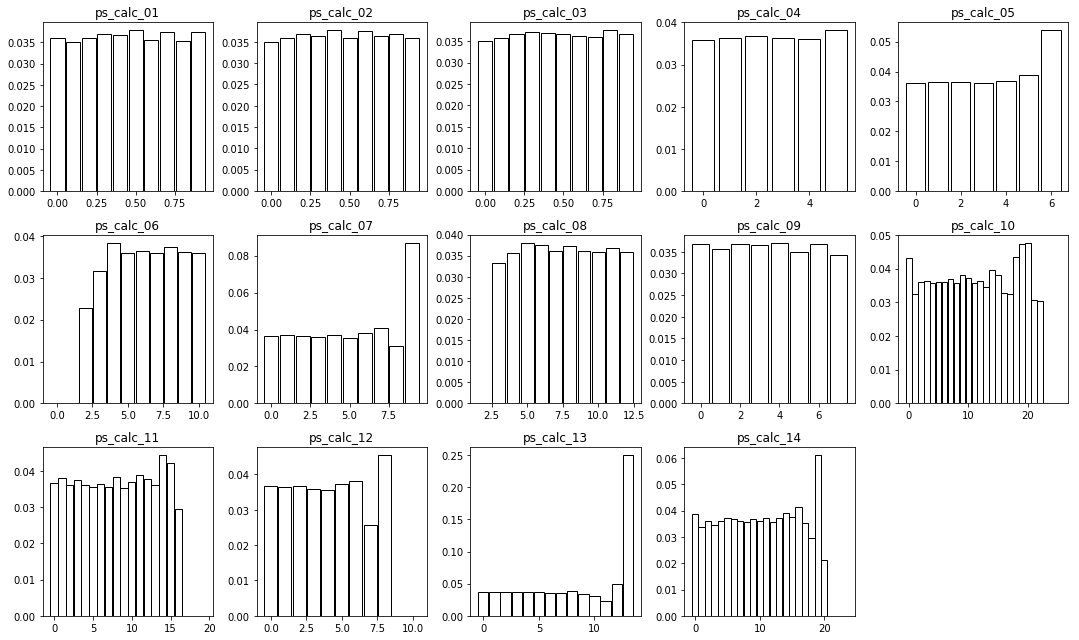

In [39]:
y = train.target
fig = plt.figure(figsize=(15, 9))
for i, f in enumerate(calc_fs):
    ax = fig.add_subplot(3, 5, i+1)
    result = estimate_cond_prob_density(others_calc[f], y, printout=False, output=True)
    x = result.iloc[:,0]
    h = result.iloc[:,1]
    w = (np.max(x) - np.min(x))/len(x)
    ax.bar(x, h, width=w, fill=False)
    ax.set_title('%s' % f)

plt.tight_layout()

<b>ps_calc_13 has absolute high predictive power with ~25% chance of being in class one if the feature takes one particular value. Others do not have such high absolute conditional probabilities, however, particular values for some features (ps_calc_05, 07, and 14) have relative discriminating power over other values. These features may be useful.</b>

<b>'others_car' features</b>

In [40]:
for f in car_fs:
    print('%s: %d unique values. Max=%.1f, Min=%.1f' \
           % (f, len(others_car[f].unique()), np.max(others_car[f]), np.min(others_car[f])))

ps_car_11: 5 unique values. Max=3.0, Min=-1.0
ps_car_12: 184 unique values. Max=1.3, Min=-1.0
ps_car_13: 70482 unique values. Max=3.7, Min=0.3
ps_car_14: 850 unique values. Max=0.6, Min=-1.0
ps_car_15: 15 unique values. Max=3.7, Min=0.0


In [41]:
others_car['ps_car_11'].unique()

array([ 2,  3,  1,  0, -1])

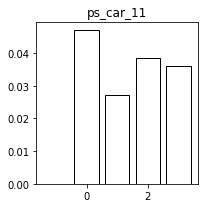

In [42]:
y = train.target
fig = plt.figure(figsize=(3, 3))
for i, f in enumerate(['ps_car_11']):
    ax = fig.add_subplot(1, 1, i+1)
    result = estimate_cond_prob_density(others_car[f], y, printout=False, output=True)
    x = result.iloc[:,0]
    h = result.iloc[:,1]
    w = (np.max(x) - np.min(x))/len(x)
    ax.bar(x, h, width=w, fill=False)
    ax.set_title('%s' % f)

plt.tight_layout()

Other features in this category cannot be assessed with this function immediately because the feature is more continous than the ones seen above.

<b>'others_ind' features</b>

In [43]:
for f in ind_fs:
    print('%s: %d unique values. Max=%.1f, Min=%.1f' \
           % (f, len(others_ind[f].unique()), np.max(others_ind[f]), np.min(others_ind[f])))

ps_ind_01: 8 unique values. Max=7.0, Min=0.0
ps_ind_03: 12 unique values. Max=11.0, Min=0.0
ps_ind_14: 5 unique values. Max=4.0, Min=0.0
ps_ind_15: 14 unique values. Max=13.0, Min=0.0


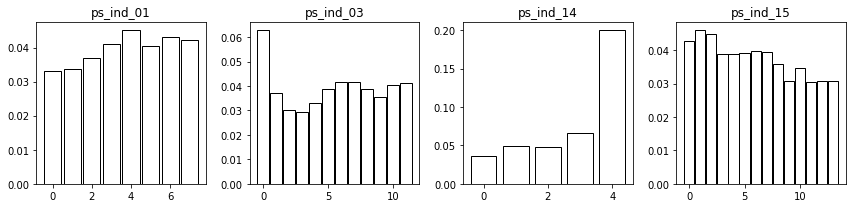

In [44]:
y = train.target
fig = plt.figure(figsize=(12, 3))
for i, f in enumerate(ind_fs):
    ax = fig.add_subplot(1, 4, i+1)
    result = estimate_cond_prob_density(others_ind[f], y, printout=False, output=True)
    x = result.iloc[:,0]
    h = result.iloc[:,1]
    w = (np.max(x) - np.min(x))/len(x)
    ax.bar(x, h, width=w, fill=False)
    ax.set_title('%s' % f)

plt.tight_layout()

ps_ind_14 may be useful

<b>'others_reg' features</b>

In [45]:
for f in reg_fs:
    print('%s: %d unique values. Max=%.1f, Min=%.1f' \
           % (f, len(others_reg[f].unique()), np.max(others_reg[f]), np.min(others_reg[f])))

ps_reg_01: 10 unique values. Max=0.9, Min=0.0
ps_reg_02: 19 unique values. Max=1.8, Min=0.0
ps_reg_03: 5013 unique values. Max=4.0, Min=-1.0


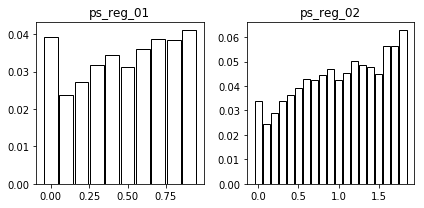

In [46]:
y = train.target
fig = plt.figure(figsize=(6, 3))
for i, f in enumerate(['ps_reg_01', 'ps_reg_02']):
    ax = fig.add_subplot(1, 2, i+1)
    result = estimate_cond_prob_density(others_reg[f], y, printout=False, output=True)
    x = result.iloc[:,0]
    h = result.iloc[:,1]
    w = (np.max(x) - np.min(x))/len(x)
    ax.bar(x, h, width=w, fill=False)
    ax.set_title('%s' % f)

plt.tight_layout()

<b>This is interesting. If not zero, probability increases linearly with the feature value. To a lesser extent so reg_01.</b>

## Conclusion
- There are ordinal and semi-continous features that can be treated similarly to categorical variables. 
- Having a certain value for a particular feature can yield some predictive power
- Truly continuous variables should be analyzed separately for the distribution of conditional probabilities
  (i.e. P(class1|feature=(some value)))

## Take a look at truly continuous features

In [47]:
continuous_fs = ['ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_reg_03']
continuous = train[continuous_fs].replace({-1: np.NaN})
continuous = continuous.dropna()

In [48]:
for f in continuous_fs:
    print('%s: %d unique values' % (f, len(continuous[f].unique())))
continuous.describe()

ps_car_12: 165 unique values
ps_car_13: 60794 unique values
ps_car_14: 838 unique values
ps_reg_03: 5003 unique values


,ps_car_12,ps_car_13,ps_car_14,ps_reg_03
count,453048.000000,453048.000000,453048.000000,453048.000000
mean,0.379090,0.807980,0.374539,0.892800
std,0.057174,0.220679,0.044416,0.345027
min,0.141421,0.250619,0.109545,0.061237
25%,0.316228,0.667052,0.350714,0.632456
50%,0.374166,0.760009,0.374433,0.800000
75%,0.400000,0.901055,0.397492,1.081954
max,1.264911,3.720626,0.636396,4.037945


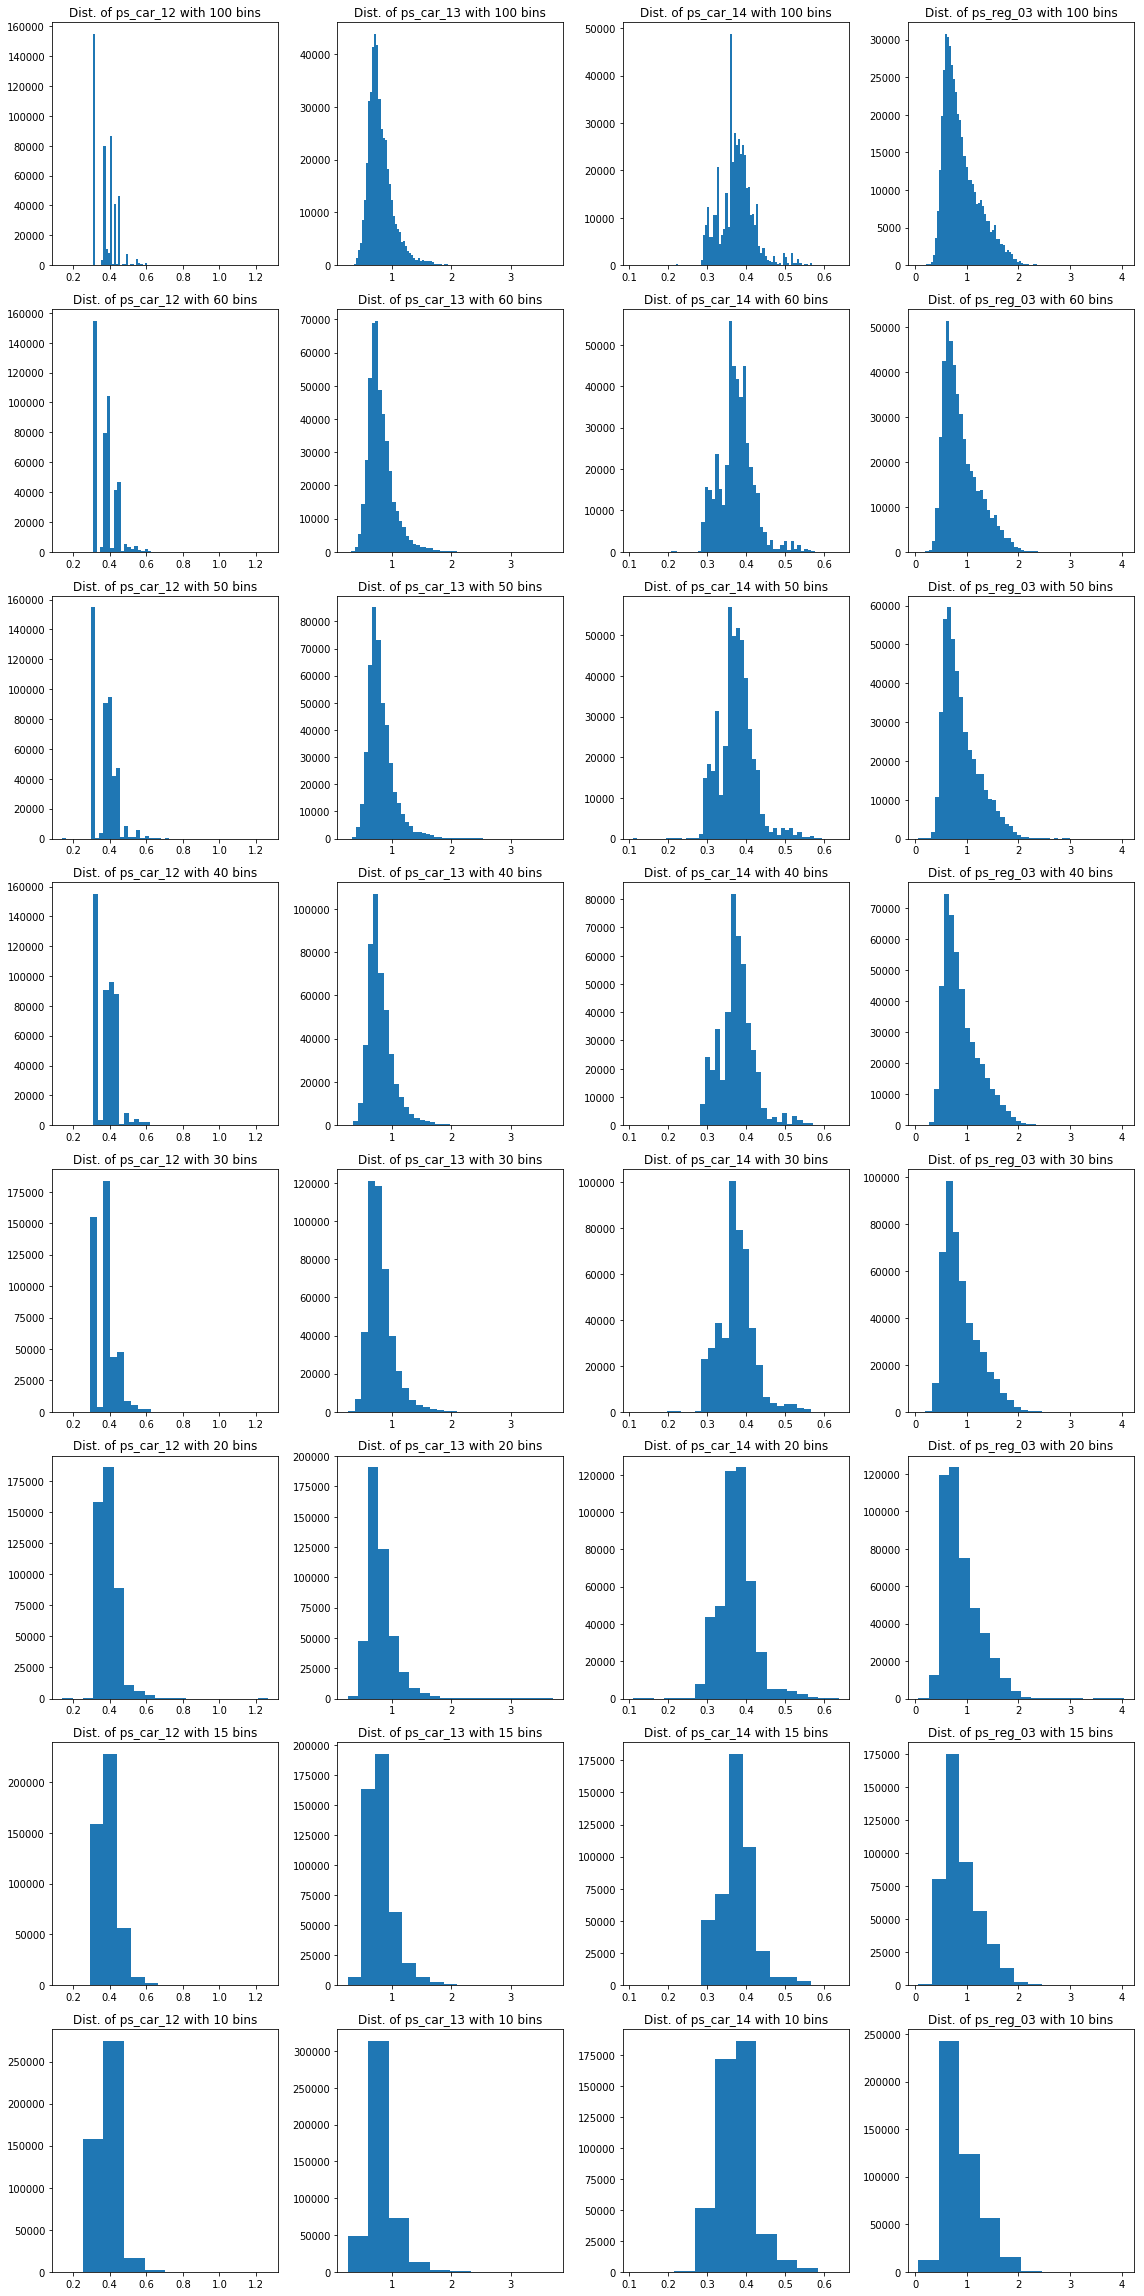

In [49]:
bins_range = [100, 60, 50, 40, 30, 20, 15, 10]
num_rows = len(bins_range)
fig = plt.figure(figsize=(16, 4*num_rows))
counter = 1
for j, bins in enumerate(bins_range):
    for i, feature in enumerate(continuous_fs):
        ax = fig.add_subplot(num_rows, 4, counter)
        ax.hist(continuous[feature], bins=bins)
        ax.set_title('Dist. of %s with %d bins' % (feature, bins), fontsize=12)
        counter += 1
plt.tight_layout()

50+ seems reasonable for number of bins for ps_car_13 and ps_reg_03. Maybe 30 for ps_car_14, and 20 for ps_car_12. If I could come up with a way to estimate continuous density, that could be used in stead of binning too.

In [109]:
def bin_myFeature(feature_vector, bins=10):
    max_val = np.max(feature_vector)
    min_val = np.min(feature_vector)
    bin_size = (max_val - min_val)/bins
    bin_cutoffs = []
    start = min_val
    while start < max_val:
        bin_cutoffs.append(start)
        start += bin_size
    x = np.array(feature_vector)
    
    #Create vecor containing the bin_label for each x entry
    x_binned_inds = np.digitize(x, bin_cutoffs)
    
    # create new sets of bin_labels with means for each bin
    #bin_means = [feature_vector[x_bins == i].mean() for i in range(1, len(bin_cutoffs)+1)]
    #print(bin_means)
    
    # Replaced the original value with mean of the bin.
    x_binned = [bin_cutoffs[x_binned_inds[i]-1] for i in range(len(x_binned_inds))]
    binned_feature = pd.Series(x_binned, name=(feature_vector.name + '_binned'))
    #print(x.shape, binned_feature.shape)
    
    return binned_feature

In [165]:
def bin_myFeature(feature_vector, bin_min, bin_max, bins=10):
    '''
    Takes in a pd.Series, and convert the continuous variables there into digitized/binned
    semi-continuous/ordinal series. bin_min and bin_max define the ends of the available bins
    and 'bins' paramter is the number of bins to create. Each entry is converted to the
    minimum value of the range of the bin it belongs to. Which bin label/category it belongs
    to (i.e. index for bins, starting with 1. Designated as 'inds') is also returned along 
    with the converted feature (designated as 'binned_feature')
    '''
    x = np.array(feature_vector)
    
    # Creating bins
    bin_size = (bin_max - bin_min)/bins
    bin_cutoffs = []
    start = bin_min
    while start < bin_max:
        bin_cutoffs.append(start)
        start += bin_size
    
    #Create vecor containing the bin label/category for each x entry
    x_binned_inds = np.digitize(x, bin_cutoffs)
    
    # Replaced the original value with minimum of the bin.
    x_binned = [bin_cutoffs[x_binned_inds[i]-1] for i in range(len(x_binned_inds))]
    
    # Convert the arrays into pd.Series
    inds =  pd.Series(x_binned_inds, name=(feature_vector.name + '_binned_index'), index=feature_vector.index)
    binned_feature = pd.Series(x_binned, name=(feature_vector.name + '_binned'), index=feature_vector.index)
    
    # for testing purpose
    #print(len(bin_cutoffs))
    #print(len(binned_feature.unique()))
    #print(len(set(x_binned_inds)))
    #print(x.shape)
    #print(binned_feature.shape)
    #print(inds.shape)
    
    return inds, binned_feature

In [186]:
# Testing the binning function
a = train['ps_reg_03'].replace({-1:np.NaN}).dropna()
inds, b = bin_myFeature(a, 0, 5, bins=50)
pd.concat([a, b, inds], axis=1)

,ps_reg_03,ps_reg_03_binned,ps_reg_03_binned_index
0,0.718070,0.7,8
1,0.766078,0.7,8
3,0.580948,0.5,6
4,0.840759,0.8,9
5,2.332649,2.3,24
6,0.617454,0.6,7
7,0.607248,0.6,7
8,0.901388,0.9,10
9,2.316652,2.3,24
10,0.795692,0.7,8


<b>'ps_car_12' conditional prob distribution</b>

In [215]:
X = train[['ps_car_12', 'target']].replace({-1:np.NaN}).dropna()
X.describe()

,ps_car_12,target
count,595211.000000,595211.000000
mean,0.379947,0.036448
std,0.058300,0.187401
min,0.100000,0.000000
25%,0.316228,0.000000
50%,0.374166,0.000000
75%,0.400000,0.000000
max,1.264911,1.000000


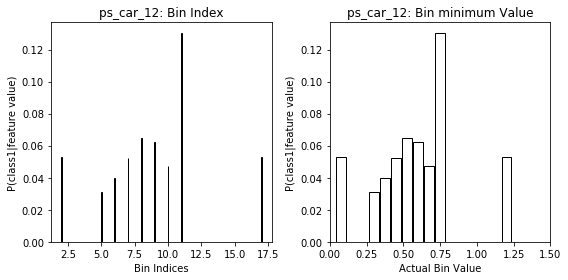

In [216]:
binned_inds, binned_f = bin_myFeature(X.iloc[:, 0], 0, 1.5, bins=20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
result1 = estimate_cond_prob_density(binned_inds, X.iloc[:, 1], printout=False, output=True)
x1 = result1.iloc[:,0]
h1 = result1.iloc[:,1]
w1 = (np.max(x1) - np.min(x1))/len(x1)
ax1.bar(x1, h1, width=w, fill=False)
ax1.set_title('ps_car_12: Bin Index')
ax1.set_xlabel('Bin Indices')
ax1.set_ylabel('P(class1|feature value)')

result2 = estimate_cond_prob_density(binned_f, X.iloc[:, 1], printout=False, output=True)
x2 = result2.iloc[:,0]
h2 = result2.iloc[:,1]
w2 = (np.max(x2) - np.min(x1))/len(x2)
ax2.bar(x2, h2, width=w, fill=False)
ax2.set_title('ps_car_12: Bin minimum Value')
ax2.set_xlabel('Actual Bin Value')
ax2.set_ylabel('P(class1|feature value)')
ax2.set_xlim([0, 1.5])

plt.tight_layout()

The bin around 0.75 seems pretty useful

<b>'ps_car_13' conditional prob distribution</b>

In [217]:
X = train[['ps_car_13', 'target']].replace({-1:np.NaN}).dropna()
X.describe()

,ps_car_13,target
count,595212.000000,595212.000000
mean,0.813265,0.036448
std,0.224588,0.187401
min,0.250619,0.000000
25%,0.670867,0.000000
50%,0.765811,0.000000
75%,0.906190,0.000000
max,3.720626,1.000000


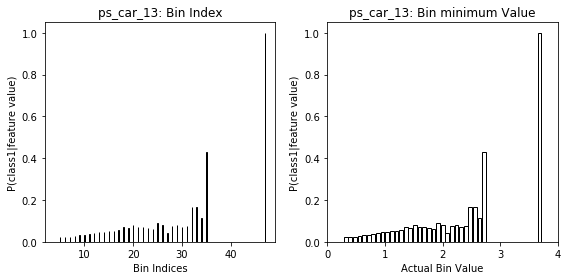

In [218]:
binned_inds, binned_f = bin_myFeature(X.iloc[:, 0], 0, 4, bins=50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
result1 = estimate_cond_prob_density(binned_inds, X.iloc[:, 1], printout=False, output=True)
x1 = result1.iloc[:,0]
h1 = result1.iloc[:,1]
w1 = (np.max(x1) - np.min(x1))/len(x1)
ax1.bar(x1, h1, width=w, fill=False)
ax1.set_title('ps_car_13: Bin Index')
ax1.set_xlabel('Bin Indices')
ax1.set_ylabel('P(class1|feature value)')

result2 = estimate_cond_prob_density(binned_f, X.iloc[:, 1], printout=False, output=True)
x2 = result2.iloc[:,0]
h2 = result2.iloc[:,1]
w2 = (np.max(x2) - np.min(x1))/len(x2)
ax2.bar(x2, h2, width=w, fill=False)
ax2.set_title('ps_car_13: Bin minimum Value')
ax2.set_xlabel('Actual Bin Value')
ax2.set_ylabel('P(class1|feature value)')
ax2.set_xlim([0, 4])

plt.tight_layout()

The last two bins are quite usefull. It's not clear how many entries there are, but if the value falls in the last bin, the predictability of the entry being in class1 is amost 100%

<b>'ps_car_14' conditional prob distribution</b>

In [219]:
X = train[['ps_car_14', 'target']].replace({-1:np.NaN}).dropna()
X.describe()

,ps_car_14,target
count,552592.000000,552592.000000
mean,0.374691,0.036141
std,0.045610,0.186640
min,0.109545,0.000000
25%,0.350428,0.000000
50%,0.373497,0.000000
75%,0.398121,0.000000
max,0.636396,1.000000


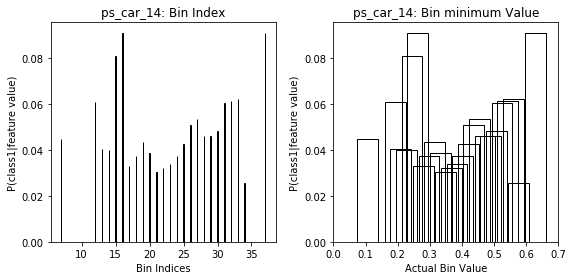

In [220]:
binned_inds, binned_f = bin_myFeature(X.iloc[:, 0], 0, 0.7, bins=40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
result1 = estimate_cond_prob_density(binned_inds, X.iloc[:, 1], printout=False, output=True)
x1 = result1.iloc[:,0]
h1 = result1.iloc[:,1]
w1 = (np.max(x1) - np.min(x1))/len(x1)
ax1.bar(x1, h1, width=w, fill=False)
ax1.set_title('ps_car_14: Bin Index')
ax1.set_xlabel('Bin Indices')
ax1.set_ylabel('P(class1|feature value)')

result2 = estimate_cond_prob_density(binned_f, X.iloc[:, 1], printout=False, output=True)
x2 = result2.iloc[:,0]
h2 = result2.iloc[:,1]
w2 = (np.max(x2) - np.min(x1))/len(x2)
ax2.bar(x2, h2, width=w, fill=False)
ax2.set_title('ps_car_14: Bin minimum Value')
ax2.set_xlabel('Actual Bin Value')
ax2.set_ylabel('P(class1|feature value)')
ax2.set_xlim([0, 0.7])

plt.tight_layout()

Conditional probability values are all less than 0.1, This feature is probably not so useful compared to others.

<b>'ps_reg_03' conditional prob distribution</b>

In [221]:
X = train[['ps_reg_03', 'target']].replace({-1:np.NaN}).dropna()
X.describe()

,ps_reg_03,target
count,487440.000000,487440.000000
mean,0.894047,0.038228
std,0.345413,0.191747
min,0.061237,0.000000
25%,0.633443,0.000000
50%,0.801561,0.000000
75%,1.083974,0.000000
max,4.037945,1.000000


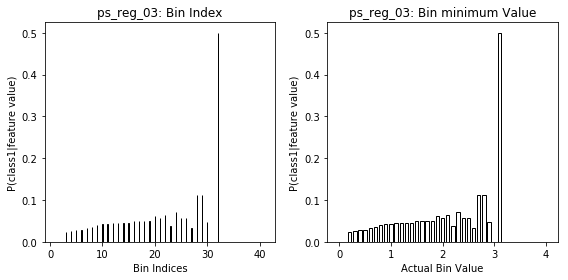

In [222]:
binned_inds, binned_f = bin_myFeature(X.iloc[:, 0], 0, 5, bins=50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
result1 = estimate_cond_prob_density(binned_inds, X.iloc[:, 1], printout=False, output=True)
x1 = result1.iloc[:,0]
h1 = result1.iloc[:,1]
w1 = (np.max(x1) - np.min(x1))/len(x1)
ax1.bar(x1, h1, width=w, fill=False)
ax1.set_title('ps_reg_03: Bin Index')
ax1.set_xlabel('Bin Indices')
ax1.set_ylabel('P(class1|feature value)')

result2 = estimate_cond_prob_density(binned_f, X.iloc[:, 1], printout=False, output=True)
x2 = result2.iloc[:,0]
h2 = result2.iloc[:,1]
w2 = (np.max(x2) - np.min(x1))/len(x2)
ax2.bar(x2, h2, width=w, fill=False)
ax2.set_title('ps_reg_03: Bin minimum Value')
ax2.set_xlabel('Actual Bin Value')
ax2.set_ylabel('P(class1|feature value)')

plt.tight_layout()

Just like one of the features above, if the value falls in the last bin, the predictability of being in class1 is very high.